<a href="https://colab.research.google.com/github/PROACT-team/2023-Loss-of-autonomy-in-swallowing/blob/main/1_Patient_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read datasets needed (if using local files)
from google.colab import files
uploaded = files.upload()

Saving all_forms_PROACT_leaderboard_full.txt to all_forms_PROACT_leaderboard_full.txt
Saving all_forms_PROACT_training.txt to all_forms_PROACT_training.txt
Saving all_forms_PROACT_training2.txt to all_forms_PROACT_training2.txt
Saving all_forms_PROACT_validation_full.txt to all_forms_PROACT_validation_full.txt


In [ ]:
# import raw data (if using local files)
import io
raw_1 = pd.read_csv(io.BytesIO(uploaded['all_forms_PROACT_leaderboard_full.txt']), sep="|")
raw_2 = pd.read_csv(io.BytesIO(uploaded['all_forms_PROACT_training.txt']), sep="|")
raw_3 = pd.read_csv(io.BytesIO(uploaded['all_forms_PROACT_training2.txt']), sep="|")
raw_4 = pd.read_csv(io.BytesIO(uploaded['all_forms_PROACT_validation_full.txt']), sep="|")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# import raw data (if using google drive files)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import raw data (if using google drive files)
raw_1 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_leaderboard_full.txt", sep="|")
raw_2 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_training.txt", sep="|")
raw_3 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_training2.txt", sep="|")
raw_4 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_validation_full.txt", sep="|")

<ipython-input-4-a96e8c8c4608>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_1 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_leaderboard_full.txt", sep="|")
<ipython-input-4-a96e8c8c4608>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_2 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_training.txt", sep="|")
<ipython-input-4-a96e8c8c4608>:5: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_4 = pd.read_csv("/content/drive/MyDrive/Predicting Loss of Autonomy/Raw data/PRO-ACT/all_forms_PROACT_validation_full.txt", sep="|")


In [ ]:
RAW = pd.concat([raw_1, raw_2, raw_3, raw_4])
RAW.head()

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,586,Demographic,Gender,M,NaN,0.0
1,2416,Demographic,Gender,M,NaN,0.0
2,5773,Demographic,Gender,M,NaN,0.0
3,10456,Demographic,Gender,M,NaN,0.0
4,10517,Demographic,Gender,F,NaN,0.0


In [ ]:
#Run this if the code below pops an error
RAW = RAW.drop(['Unnamed: 0'], axis=1)

In [ ]:
RAW.head()

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,586,Demographic,Gender,M,NaN,0.0
1,2416,Demographic,Gender,M,NaN,0.0
2,5773,Demographic,Gender,M,NaN,0.0
3,10456,Demographic,Gender,M,NaN,0.0
4,10517,Demographic,Gender,F,NaN,0.0


#Original Data

### n=10723

In [ ]:
print("Original data contains", len(RAW['SubjectID'].unique().tolist()), " patients")

Original data contains 10723  patients


In [ ]:
print("Original data contains", len(RAW['form_name'].unique().tolist()), " feature categories")
print(RAW['form_name'].unique().tolist())

Original data contains 12  feature categories
['Demographic', 'ALSHX', 'Riluzole', 'Treatment', 'FamilyHx', 'ALSFRS', 'Vitals', 'FVC', 'SVC', 'Lab Test', 'Adverse Event', 'Concomitant Medication']


In [ ]:
print("Original data contains", len(RAW['feature_name'].unique().tolist()), "features")
print(RAW['feature_name'].unique().tolist())

Original data contains 6704 features
['Gender', 'Age', 'Race', 'onset_delta', 'diag_delta', 'onset_site', 'if_use_Riluzole', 'treatment_group', 'family_ALS_hist', 'Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 'Q5a_Cutting_without_Gastrostomy', 'Q5b_Cutting_with_Gastrostomy', 'Q5_Cutting', 'Q6_Dressing_and_Hygiene', 'Q7_Turning_in_Bed', 'Q8_Walking', 'Q9_Climbing_Stairs', 'Q10_Respiratory', 'R1_Dyspnea', 'R2_Orthopnea', 'R3_Respiratory_Insufficiency', 'ALSFRS_Total', 'ALSFRS_R_Total', 'mouth', 'hands', 'trunk', 'leg', 'respiratory', 'respiratory_R', 'weight', 'height', 'temperature', 'pulse', 'respiratory_rate', 'bp_diastolic', 'bp_systolic', 'BMI', 'fvc_normal', 'fvc1', 'fvc_percent1', 'fvc2', 'fvc_percent2', 'fvc3', 'fvc_percent3', 'fvc', 'fvc_percent', 'svc', 'svc_percent', 'Urine Glucose', 'Hemoglobin', 'Red Blood Cells (RBC)', 'Potassium', 'Absolute Neutrophil Count', 'Bicarbonate', 'Urine Nitrite', 'Urine Squamous Epithelial Cells', 'Phosphate', 'Partial Thrombo

#1st Filtering; Demographic records either none(n=2070) or incomplete(n=7)

###n=8646

In [ ]:
Demographics = RAW.query("form_name =='Demographic'")[['SubjectID','form_name', 'feature_name', 'feature_value']]
print("Demographics contains", len(Demographics['SubjectID'].unique().tolist()), " patients")

Demographics contains 8653  patients


In [ ]:
Demographics['feature_name'].value_counts()

Gender    8653
Race      8653
Age       8646
Name: feature_name, dtype: int64

In [ ]:
from functools import reduce
Gender = Demographics[Demographics['feature_name'] == 'Gender'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'Gender'})
Race = Demographics[Demographics['feature_name'] == 'Race'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'Race'})
Age = Demographics[Demographics['feature_name'] == 'Age'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'Age'})
Demographics = reduce(lambda x, y : pd.merge(x,y, on='SubjectID', how='outer'), [Gender, Race, Age])
Demographics

,SubjectID,Gender,Race,Age
0,586,M,White,63.2849315068493
1,2416,M,White,72.7506849315069
2,5773,M,White,59.9013698630137
3,10456,M,White,72.5753424657534
4,10517,F,White,57.1534246575342
...,...,...,...,...
8648,996808,M,White,53
8649,997367,M,White,43
8650,997496,M,White,51
8651,998261,M,White,63.1671232876712


In [ ]:
Demographics[Demographics['SubjectID'].isnull()]

,SubjectID,Gender,Race,Age


In [ ]:
Demographics[Demographics['Gender'].isnull()]

,SubjectID,Gender,Race,Age
328,819608,NaN,Unknown,NaN
7232,44556,NaN,Unknown,NaN
7840,461588,NaN,Unknown,NaN
8225,707756,NaN,Unknown,NaN
8313,775051,NaN,Unknown,NaN
8497,898684,NaN,Unknown,NaN


In [ ]:
Demographics[Demographics['Race'].isnull()]

,SubjectID,Gender,Race,Age


In [ ]:
Demographics[Demographics['Age'].isnull()]

,SubjectID,Gender,Race,Age
328,819608,NaN,Unknown,NaN
7232,44556,NaN,Unknown,NaN
7644,314931,M,White,NaN
7840,461588,NaN,Unknown,NaN
8225,707756,NaN,Unknown,NaN
8313,775051,NaN,Unknown,NaN
8497,898684,NaN,Unknown,NaN


In [ ]:
print(len(Demographics[Demographics['Age'].isnull()]), 'values are incomplete in demographics')

7 values are incomplete in demographics


In [ ]:
Filtered_1 = RAW[RAW['SubjectID'].isin(Demographics.dropna()['SubjectID'].to_list())]
Filtered_1

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,586,Demographic,Gender,M,NaN,0.0
1,2416,Demographic,Gender,M,NaN,0.0
2,5773,Demographic,Gender,M,NaN,0.0
3,10456,Demographic,Gender,M,NaN,0.0
4,10517,Demographic,Gender,F,NaN,0.0
...,...,...,...,...,...,...
956882,992712,Concomitant Medication,MIDAZOLAM,0.5;1 time only;Intravenous,Milligrams (mg),21;21
956883,992712,Concomitant Medication,RILUZOLE,50;QD (every day);Oral,Milligrams (mg),49;97
956884,992712,Concomitant Medication,RILUZOLE,50;BID (twice a day);Oral,Milligrams (mg),98;NA
956885,992712,Concomitant Medication,SOLIFENACIN SUCCINATE,5;QD (every day);Oral,Milligrams (mg),532;NA


In [ ]:
print("Filtered_1 data contains", len(Filtered_1['SubjectID'].unique().tolist()), " patients")

Filtered_1 data contains 8646  patients


#2nd Filtering; ALS history either none(n=1419) or incomplete(n=2770) or errorneous values (n=15)

###n=4442

In [ ]:
ALS_hx = Filtered_1.query("form_name =='ALSHX'")[['SubjectID','form_name', 'feature_name', 'feature_value']]
print("ALS_hx contains", len(ALS_hx['SubjectID'].unique().tolist()), " patients")

ALS_hx contains 7227  patients


In [ ]:
ALS_hx['feature_name'].value_counts()

onset_site     7226
onset_delta    6888
diag_delta     4460
Name: feature_name, dtype: int64

In [ ]:
onset_site = ALS_hx[ALS_hx['feature_name'] == 'onset_site'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'onset_site'})
onset_delta = ALS_hx[ALS_hx['feature_name'] == 'onset_delta'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'onset_delta'})
diag_delta = ALS_hx[ALS_hx['feature_name'] == 'diag_delta'][['SubjectID', 'feature_value']].rename(columns = {'feature_value': 'diag_delta'})
ALS_hx = reduce(lambda x, y : pd.merge(x,y, on='SubjectID', how='outer'), [onset_site, onset_delta, diag_delta])
ALS_hx

,SubjectID,onset_site,onset_delta,diag_delta
0,586,Bulbar,-715,-507
1,2416,Bulbar,-878,-633
2,5773,Bulbar,-587,-231
3,10456,Limb,-1110,-39
4,10517,Limb,-374,-247
...,...,...,...,...
7222,997367,Limb,-518,-426
7223,997496,Limb,-471,-44
7224,998261,Limb,-587,NaN
7225,999929,Limb,-411,-107


In [ ]:
ALS_hx = ALS_hx.astype({'onset_delta':'float', 'diag_delta':'float'})

In [ ]:
# Convert scale 'days' to 'month'
ALS_hx['onset_delta'] = -round((ALS_hx['onset_delta']/365)*12,2)
ALS_hx['diag_delta'] = -round((ALS_hx['diag_delta']/365)*12,2)

In [ ]:
ALS_hx[ALS_hx['SubjectID'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta


In [ ]:
ALS_hx[ALS_hx['onset_site'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta
7226,657543,NaN,25.32,9.57


In [ ]:
ALS_hx[ALS_hx['onset_delta'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta
104,256878,Bulbar,NaN,NaN
163,431659,Bulbar,NaN,NaN
174,457236,Bulbar,NaN,NaN
209,557755,Bulbar,NaN,NaN
276,744533,Bulbar,NaN,NaN
...,...,...,...,...
7010,850171,Bulbar,NaN,NaN
7050,877632,Bulbar,NaN,NaN
7161,955194,Bulbar,NaN,NaN
7175,963566,Bulbar,NaN,NaN


In [ ]:
ALS_hx[ALS_hx['diag_delta'].isnull()]

,SubjectID,onset_site,onset_delta,diag_delta
11,19344,Limb,26.79,NaN
14,23315,Limb,21.73,NaN
26,58741,Limb,16.21,NaN
33,75445,Limb,18.97,NaN
38,82284,Limb,14.33,NaN
...,...,...,...,...
7200,978904,Limb,7.79,NaN
7206,981749,Limb,34.49,NaN
7212,991132,Limb,8.71,NaN
7216,993045,Limb,28.44,NaN


In [ ]:
print(len(ALS_hx['SubjectID'])-len(ALS_hx.dropna()['SubjectID']), 'values are incomplete in ALS_hx')

2770 values are incomplete in ALS_hx


In [ ]:
ALS_hx_v2 = ALS_hx[ALS_hx['SubjectID'].isin(ALS_hx.dropna()['SubjectID'].to_list())]
ALS_hx_v2

,SubjectID,onset_site,onset_delta,diag_delta
0,586,Bulbar,23.51,16.67
1,2416,Bulbar,28.87,20.81
2,5773,Bulbar,19.30,7.59
3,10456,Limb,36.49,1.28
4,10517,Limb,12.30,8.12
...,...,...,...,...
7220,996711,Bulbar,14.76,4.41
7221,996808,Other,21.90,10.06
7222,997367,Limb,17.03,14.01
7223,997496,Limb,15.48,1.45


In [ ]:
ALS_hx_v3 = ALS_hx_v2.query("(diag_delta >= 0) and (onset_delta >= 0) and (diag_delta <= onset_delta)") #exclude errorneous data
ALS_hx_v3

,SubjectID,onset_site,onset_delta,diag_delta
0,586,Bulbar,23.51,16.67
1,2416,Bulbar,28.87,20.81
2,5773,Bulbar,19.30,7.59
3,10456,Limb,36.49,1.28
4,10517,Limb,12.30,8.12
...,...,...,...,...
7220,996711,Bulbar,14.76,4.41
7221,996808,Other,21.90,10.06
7222,997367,Limb,17.03,14.01
7223,997496,Limb,15.48,1.45


In [ ]:
print(len(ALS_hx_v2['SubjectID'])-len(ALS_hx_v3['SubjectID']), 'values are errorneous in ALS_hx')

15 values are errorneous in ALS_hx


In [ ]:
Filtered_2 = RAW[RAW['SubjectID'].isin(ALS_hx_v3.dropna()['SubjectID'].to_list())]
Filtered_2

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,586,Demographic,Gender,M,NaN,0.0
1,2416,Demographic,Gender,M,NaN,0.0
2,5773,Demographic,Gender,M,NaN,0.0
3,10456,Demographic,Gender,M,NaN,0.0
4,10517,Demographic,Gender,F,NaN,0.0
...,...,...,...,...,...,...
956882,992712,Concomitant Medication,MIDAZOLAM,0.5;1 time only;Intravenous,Milligrams (mg),21;21
956883,992712,Concomitant Medication,RILUZOLE,50;QD (every day);Oral,Milligrams (mg),49;97
956884,992712,Concomitant Medication,RILUZOLE,50;BID (twice a day);Oral,Milligrams (mg),98;NA
956885,992712,Concomitant Medication,SOLIFENACIN SUCCINATE,5;QD (every day);Oral,Milligrams (mg),532;NA


In [ ]:
print("Filtered_2 data contains", len(Filtered_2['SubjectID'].unique().tolist()), " patients")

Filtered_2 data contains 4442  patients


#3rd Filtering; ALSFRS-R; participants without any complete record(n=1384) for the first 3 months

###n=3058

In [ ]:
# Concomitant medication and Adverse Event's feature_delta is not float type
Filtered_2.query("(form_name =='Concomitant Medication') or (form_name == 'Adverse Event')")[['SubjectID','form_name', 'feature_name', 'feature_value', 'feature_delta']]

,SubjectID,form_name,feature_name,feature_value,feature_delta
256273,10517,Adverse Event,Gastrointestinal motility and defaecation cond...,Constipation;Constipation;Gastrointestinal ato...,38;40
256274,10517,Adverse Event,Infections - pathogen unspecified,UTI;Urinary tract infection;Urinary tract infe...,84;90
256275,10517,Adverse Event,Gastrointestinal signs and symptoms,Abdominal pain;Abdominal pain;Gastrointestinal...,84;89
256276,10517,Adverse Event,General system disorders NEC,Chest pain;Chest pain;Pain and discomfort NEC;...,140;140
256277,10517,Adverse Event,Vascular disorders NEC,Hot flashes;Hot flush;Peripheral vascular diso...,220;220
...,...,...,...,...,...
956882,992712,Concomitant Medication,MIDAZOLAM,0.5;1 time only;Intravenous,21;21
956883,992712,Concomitant Medication,RILUZOLE,50;QD (every day);Oral,49;97
956884,992712,Concomitant Medication,RILUZOLE,50;BID (twice a day);Oral,98;NA
956885,992712,Concomitant Medication,SOLIFENACIN SUCCINATE,5;QD (every day);Oral,532;NA


In [ ]:
Filtered_2_alsfrs_R = Filtered_2.query("form_name == 'ALSFRS'")
Filtered_2_alsfrs_R = Filtered_2_alsfrs_R.astype({'feature_delta':'float'})
Filtered_2_alsfrs_R['feature_delta'].isnull().describe() #feature delta value of ALSFRS has no NaNs

count     749412
unique         1
top        False
freq      749412
Name: feature_delta, dtype: object

In [ ]:
Filtered_2_alsfrs_R.dtypes

SubjectID          int64
form_name         object
feature_name      object
feature_value     object
feature_unit      object
feature_delta    float64
dtype: object

In [ ]:
# Convert scale 'days' to 'month'
Filtered_2_alsfrs_R[['feature_delta']] = round((Filtered_2_alsfrs_R[['feature_delta']]/365)*12,2)
Filtered_2_alsfrs_R

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
3007,586,ALSFRS,Q1_Speech,0,NaN,0.10
3008,2416,ALSFRS,Q1_Speech,0,NaN,0.07
3009,5773,ALSFRS,Q1_Speech,3,NaN,0.00
3010,10456,ALSFRS,Q1_Speech,4,NaN,0.00
3011,10517,ALSFRS,Q1_Speech,4,NaN,0.00
...,...,...,...,...,...,...
260172,996808,ALSFRS,respiratory_R,4.0,NaN,10.82
260173,996808,ALSFRS,respiratory_R,4.0,NaN,11.90
260174,996808,ALSFRS,respiratory_R,4.0,NaN,12.92
260175,996808,ALSFRS,respiratory_R,4.0,NaN,13.97


In [ ]:
ALSFRS_R_3months = Filtered_2_alsfrs_R[['SubjectID','form_name', 'feature_name', 'feature_value', 'feature_delta']].query('(feature_delta <= 3.0) and (feature_delta >= 0)')
print("ALSFRS contains", len(ALSFRS_R_3months['SubjectID'].unique().tolist()), " patients")

ALSFRS contains 4081  patients


In [ ]:
ALSFRS_R_3months

,SubjectID,form_name,feature_name,feature_value,feature_delta
3007,586,ALSFRS,Q1_Speech,0,0.10
3008,2416,ALSFRS,Q1_Speech,0,0.07
3009,5773,ALSFRS,Q1_Speech,3,0.00
3010,10456,ALSFRS,Q1_Speech,4,0.00
3011,10517,ALSFRS,Q1_Speech,4,0.00
...,...,...,...,...,...
260147,996711,ALSFRS,respiratory_R,12.0,2.33
260161,996808,ALSFRS,respiratory_R,12.0,0.00
260162,996808,ALSFRS,respiratory_R,12.0,0.89
260163,996808,ALSFRS,respiratory_R,12.0,1.87


In [ ]:
ALSFRS_R_3months['feature_name'].value_counts()

Q1_Speech                          12932
mouth                              12932
Q3_Swallowing                      12932
respiratory                        12932
Q7_Turning_in_Bed                  12932
Q8_Walking                         12932
Q9_Climbing_Stairs                 12932
Q2_Salivation                      12932
leg                                12932
Q6_Dressing_and_Hygiene            12931
trunk                              12931
ALSFRS_Total                       12931
Q5_Cutting                         12930
Q4_Handwriting                     12928
hands                              12926
Q5a_Cutting_without_Gastrostomy    11125
respiratory_R                       8717
R3_Respiratory_Insufficiency        8717
R2_Orthopnea                        8717
R1_Dyspnea                          8717
ALSFRS_R_Total                      8716
Q10_Respiratory                     6838
Q5b_Cutting_with_Gastrostomy        1814
Name: feature_name, dtype: int64

In [ ]:
def check_complete_alsfrs_r(df, feature_list):
  df_final = df[df['feature_name'] == feature_list[0]][['SubjectID', 'feature_value', 'feature_delta']].rename(columns = {'feature_value': feature_list[0]})

  del feature_list[0]
  for x in feature_list:
    df_add = df[df['feature_name'] == x][['SubjectID', 'feature_value', 'feature_delta']].rename(columns = {'feature_value': x})
    df_final = pd.merge(df_final,df_add, on=['SubjectID','feature_delta'], how='inner')

  return df_final

In [ ]:
feature_list = [x for x in ALSFRS_R_3months['feature_name'].unique().tolist() if x not in ['Q5a_Cutting_without_Gastrostomy', 'Q5b_Cutting_with_Gastrostomy', 'Q10_Respiratory']]
ALSFRS_R_function = check_complete_alsfrs_r(ALSFRS_R_3months, feature_list )

In [ ]:
len(ALSFRS_R_function['SubjectID'].unique().tolist())

3058

In [ ]:
ALSFRS_R_function

,SubjectID,Q1_Speech,feature_delta,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5_Cutting,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,...,R2_Orthopnea,R3_Respiratory_Insufficiency,ALSFRS_Total,ALSFRS_R_Total,mouth,hands,trunk,leg,respiratory,respiratory_R
0,586,0,0.10,2,1,4,4,4,4,4,...,4,4,31,39,3,8,8,8,4,12
1,2416,0,0.07,0,0,3,2,2,2,4,...,4,3,20,27,0,5,4,7,4,11
2,5773,3,0.00,3,3,4,4,4,4,4,...,4,2,36,42,9,8,8,8,3,9
3,10456,4,0.00,4,4,4,4,4,4,2,...,4,4,36,44,12,8,8,4,4,12
4,10517,4,0.00,4,4,3,1,0,0,2,...,4,4,22,30,12,4,0,2,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154430,996711,1,2.33,3,3,4,4,4,4,4,...,4.0,4.0,35.0,43.0,7.0,8.0,8.0,8.0,4.0,12.0
3154431,996808,4,0.00,4,4,3,2,2,3,2,...,4.0,4.0,29.0,37.0,12.0,5.0,5.0,3.0,4.0,12.0
3154432,996808,4,0.89,4,4,2,2,1,3,2,...,4.0,4.0,27.0,35.0,12.0,4.0,4.0,3.0,4.0,12.0
3154433,996808,4,1.87,4,4,2,2,1,3,2,...,4.0,4.0,27.0,35.0,12.0,4.0,4.0,3.0,4.0,12.0


In [ ]:
Filtered_3 = Filtered_2.query("SubjectID == {0}".format(ALSFRS_R_function['SubjectID'].unique().tolist()))
Filtered_3

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,586,Demographic,Gender,M,NaN,0.0
1,2416,Demographic,Gender,M,NaN,0.0
2,5773,Demographic,Gender,M,NaN,0.0
3,10456,Demographic,Gender,M,NaN,0.0
4,10517,Demographic,Gender,F,NaN,0.0
...,...,...,...,...,...,...
956882,992712,Concomitant Medication,MIDAZOLAM,0.5;1 time only;Intravenous,Milligrams (mg),21;21
956883,992712,Concomitant Medication,RILUZOLE,50;QD (every day);Oral,Milligrams (mg),49;97
956884,992712,Concomitant Medication,RILUZOLE,50;BID (twice a day);Oral,Milligrams (mg),98;NA
956885,992712,Concomitant Medication,SOLIFENACIN SUCCINATE,5;QD (every day);Oral,Milligrams (mg),532;NA


In [ ]:
print("Filtered_3 data contains", len(Filtered_3['SubjectID'].unique().tolist()), " patients")

Filtered_3 data contains 3058  patients


# 4th Filtering; event or censoring occurred within 3 months after enrollment(n=388)

* event definition : Q3 item score becoming 1.0 or under

### n = 2670

## Target extraction first!

In [ ]:
#Bring ALSFRS_Q3 information
Filtered_3_ALSFRS_Q3 = Filtered_3.query("feature_name =='Q3_Swallowing'")[['SubjectID','feature_value', 'feature_delta']]
Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.astype({'feature_delta':'float'})

# Convert scale 'days' to 'month'
Filtered_3_ALSFRS_Q3[['feature_delta']] = round((Filtered_3_ALSFRS_Q3[['feature_delta']]/365)*12,2)

Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.query('feature_delta >= 0').rename(columns = {'feature_value': 'Q3_Swallowing'})
Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.sort_values(by=[Filtered_3_ALSFRS_Q3.columns[0],Filtered_3_ALSFRS_Q3.columns[2]],ascending=True)
Filtered_3_ALSFRS_Q3

,SubjectID,Q3_Swallowing,feature_delta
34756,348,4,0.00
34757,348,4,0.13
34758,348,4,1.71
34759,348,4,2.01
34760,348,4,3.25
...,...,...,...
178561,999990,4.0,0.39
178564,999990,4.0,1.32
178565,999990,4.0,2.24
178562,999990,3.0,3.19


In [ ]:
print("ALSFRS_Q3 contains", len(Filtered_3_ALSFRS_Q3['SubjectID'].unique().tolist()), " patients")

ALSFRS_Q3 contains 3058  patients


In [ ]:
Filtered_3_ALSFRS_Q3 = Filtered_3_ALSFRS_Q3.astype('float')
Filtered_3_ALSFRS_Q3.dtypes

SubjectID        float64
Q3_Swallowing    float64
feature_delta    float64
dtype: object

##Note: Target definition (Q3 becoming 1.0)

## (1) Extract 'Time_to_event'

In [ ]:
# Find the first time of [ALSFRS_Q3 <= 1.0]
Target_event = Filtered_3_ALSFRS_Q3[Filtered_3_ALSFRS_Q3['Q3_Swallowing']<=1].groupby('SubjectID').agg(['first']).reset_index()
Target_event.head()

,SubjectID,Q3_Swallowing,feature_delta
,,first,first
0,533.0,1.0,9.44
1,586.0,1.0,0.10
2,1064.0,1.0,0.00
3,1736.0,1.0,8.02
4,2416.0,0.0,0.07


In [ ]:
# Coding [ALSFRS-Q3<=1] event as '1'
Target_event_1 = Target_event[[('SubjectID',''), ('feature_delta', 'first')]]
Target_event_1.columns = ['SubjectID', 'time_LOA']

Target_event_1_subject_list = list(Target_event['SubjectID'])

Target_event_1['Loss_of_autonomy'] = 1
print("There are",len(Target_event_1['SubjectID'].unique()), "subjects whose loss of autonomy = 1")

# Otherwise '0'
Target_event_0 = Filtered_3_ALSFRS_Q3[~Filtered_3_ALSFRS_Q3['SubjectID'].isin(Target_event_1_subject_list)]
Target_event_0 = Target_event_0.groupby('SubjectID').agg(['last']).reset_index().drop(columns=('Q3_Swallowing', 'last'))
Target_event_0.columns = ['SubjectID', 'time_LOA']
Target_event_0['Loss_of_autonomy'] = 0
print("There are",len(Target_event_0['SubjectID'].unique()), "subjects whose loss of autonomy = 0")

 # There are 681 subjects whose Event = 1
 # There are 2377 subjects whose Event = 0

There are 681 subjects whose loss of autonomy = 1
There are 2377 subjects whose loss of autonomy = 0


In [ ]:
ALFRS_Q3_coded = pd.concat([Target_event_1, Target_event_0]).sort_values(by='SubjectID', axis=0)
ALFRS_Q3_coded = ALFRS_Q3_coded.reset_index()
ALFRS_Q3_coded.drop(columns='index', inplace=True)

Target_Data = ALFRS_Q3_coded.copy()
Target_Data_subject_list = list(Target_Data['SubjectID'])
Target_Data #3058 data

,SubjectID,time_LOA,Loss_of_autonomy
0,348.0,13.18,0
1,533.0,9.44,1
2,586.0,0.10,1
3,902.0,5.06,0
4,1064.0,0.00,1
...,...,...,...
3053,998542.0,0.26,0
3054,998756.0,2.10,0
3055,999166.0,12.82,0
3056,999823.0,6.05,0


##(2) Exclude; event or censoring occurred within 3 months after enrollment

<Axes: xlabel='time_LOA', ylabel='Count'>

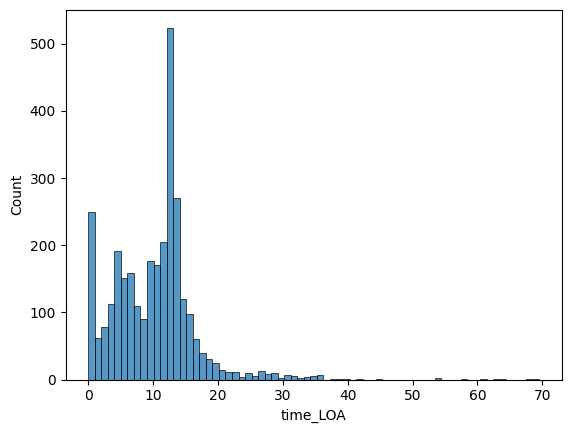

In [ ]:
sns.histplot(Target_Data['time_LOA'])

In [ ]:
Target_Data.query('time_LOA <= 3.0')

,SubjectID,time_LOA,Loss_of_autonomy
2,586.0,0.10,1
4,1064.0,0.00,1
5,1309.0,0.00,0
7,2416.0,0.07,1
8,2598.0,0.00,0
...,...,...,...
3049,997090.0,2.30,0
3050,997336.0,2.99,0
3052,998019.0,0.43,0
3053,998542.0,0.26,0


In [ ]:
print(len(Target_Data.query('time_LOA <= 3.0')['SubjectID'].tolist()), 'patients has time_LOA 3 month or less')

388 patients has time_LOA 3 month or less


In [ ]:
Target_Data_final = Target_Data.query('time_LOA > 3.0')

# minus 3months for target data value
Target_Data_final['time_LOA'] = Target_Data_final['time_LOA'] -3.0

Target_Data_final

<ipython-input-59-7988b039a57c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target_Data_final['time_LOA'] = Target_Data_final['time_LOA'] -3.0


,SubjectID,time_LOA,Loss_of_autonomy
0,348.0,10.18,0
1,533.0,6.44,1
3,902.0,2.06,0
6,1736.0,5.02,1
9,3971.0,9.43,0
...,...,...,...
3048,996981.0,3.12,0
3051,997829.0,3.08,0
3055,999166.0,9.82,0
3056,999823.0,3.05,0


In [ ]:
print(len(Target_Data['SubjectID'])-len(Target_Data_final['SubjectID']), 'patients were excluded because of early occurrence or censoring')
print(len(Target_Data.query('(time_LOA <= 3.0) and (Loss_of_autonomy == 0)')), 'out of 388 are early censored (follow up being < 3mo)')
print(len(Target_Data.query('(time_LOA <= 3.0) and (Loss_of_autonomy == 1)')), 'out of 388 are early occured (occurred before 3mo)')

388 patients were excluded because of early occurrence or censoring
284 out of 388 are right-censored (follow up being < 3mo)
104 out of 388 are left-censored (occurred before 3mo)


In [ ]:
# Note that 'time_LOA' is month scaled

In [ ]:
Target_Data_Raw_form_time = Target_Data_final.copy()[['SubjectID', 'time_LOA']]
Target_Data_Raw_form_event = Target_Data_final.copy()[['SubjectID', 'Loss_of_autonomy']]

Target_Data_Raw_form_time['form_name'] = 'Target_variable'
Target_Data_Raw_form_time['feature_name'] = 'time_LOA'
Target_Data_Raw_form_time['feature_unit'] = np.nan
Target_Data_Raw_form_time['feature_delta'] = np.nan
Target_Data_Raw_form_time = Target_Data_Raw_form_time.rename(columns = {'time_LOA': 'feature_value'})

Target_Data_Raw_form_time = Target_Data_Raw_form_time[['SubjectID', 'form_name', 'feature_name','feature_value', 'feature_unit', 'feature_delta']]
Target_Data_Raw_form_time

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,348.0,Target_variable,time_LOA,10.18,NaN,NaN
1,533.0,Target_variable,time_LOA,6.44,NaN,NaN
3,902.0,Target_variable,time_LOA,2.06,NaN,NaN
6,1736.0,Target_variable,time_LOA,5.02,NaN,NaN
9,3971.0,Target_variable,time_LOA,9.43,NaN,NaN
...,...,...,...,...,...,...
3048,996981.0,Target_variable,time_LOA,3.12,NaN,NaN
3051,997829.0,Target_variable,time_LOA,3.08,NaN,NaN
3055,999166.0,Target_variable,time_LOA,9.82,NaN,NaN
3056,999823.0,Target_variable,time_LOA,3.05,NaN,NaN


In [ ]:
Target_Data_Raw_form_event['form_name'] = 'Target_variable'
Target_Data_Raw_form_event['feature_name'] = 'status_LOA'
Target_Data_Raw_form_event['feature_unit'] = np.nan
Target_Data_Raw_form_event['feature_delta'] = np.nan
Target_Data_Raw_form_event = Target_Data_Raw_form_event.rename(columns = {'Loss_of_autonomy': 'feature_value'})

Target_Data_Raw_form_event = Target_Data_Raw_form_event[['SubjectID', 'form_name', 'feature_name','feature_value', 'feature_unit', 'feature_delta']]
Target_Data_Raw_form_event

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,348.0,Target_variable,status_LOA,0,NaN,NaN
1,533.0,Target_variable,status_LOA,1,NaN,NaN
3,902.0,Target_variable,status_LOA,0,NaN,NaN
6,1736.0,Target_variable,status_LOA,1,NaN,NaN
9,3971.0,Target_variable,status_LOA,0,NaN,NaN
...,...,...,...,...,...,...
3048,996981.0,Target_variable,status_LOA,0,NaN,NaN
3051,997829.0,Target_variable,status_LOA,0,NaN,NaN
3055,999166.0,Target_variable,status_LOA,0,NaN,NaN
3056,999823.0,Target_variable,status_LOA,0,NaN,NaN


In [ ]:
Target_Data_Raw_form = pd.concat([Target_Data_Raw_form_time, Target_Data_Raw_form_event]).sort_values(by=['SubjectID', 'form_name', 'feature_name'] ,ascending=True)
Target_Data_Raw_form

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
0,348.0,Target_variable,status_LOA,0.00,NaN,NaN
0,348.0,Target_variable,time_LOA,10.18,NaN,NaN
1,533.0,Target_variable,status_LOA,1.00,NaN,NaN
1,533.0,Target_variable,time_LOA,6.44,NaN,NaN
3,902.0,Target_variable,status_LOA,0.00,NaN,NaN
...,...,...,...,...,...,...
3055,999166.0,Target_variable,time_LOA,9.82,NaN,NaN
3056,999823.0,Target_variable,status_LOA,0.00,NaN,NaN
3056,999823.0,Target_variable,time_LOA,3.05,NaN,NaN
3057,999990.0,Target_variable,status_LOA,0.00,NaN,NaN


In [ ]:
Target_data_subject_list = Target_Data_Raw_form['SubjectID'].unique().tolist()

In [ ]:
Filtered_4_target_data_not_added = Filtered_3.query("SubjectID == {0}".format(Target_data_subject_list))
Filtered_4 = pd.concat([Filtered_4_target_data_not_added, Target_Data_Raw_form])
Filtered_4

,SubjectID,form_name,feature_name,feature_value,feature_unit,feature_delta
4,10517.0,Demographic,Gender,F,NaN,0.0
5,12808.0,Demographic,Gender,F,NaN,0.0
6,12826.0,Demographic,Gender,M,NaN,0.0
8,15060.0,Demographic,Gender,F,NaN,0.0
9,17937.0,Demographic,Gender,M,NaN,0.0
...,...,...,...,...,...,...
3055,999166.0,Target_variable,time_LOA,9.82,NaN,NaN
3056,999823.0,Target_variable,status_LOA,0.0,NaN,NaN
3056,999823.0,Target_variable,time_LOA,3.05,NaN,NaN
3057,999990.0,Target_variable,status_LOA,0.0,NaN,NaN


In [ ]:
print("Filtered_4 data contains", len(Filtered_4['SubjectID'].unique().tolist()), " patients")

Filtered_4 data contains 2670  patients


Save as

In [ ]:
Filtered_4.to_csv('/content/drive/MyDrive/Predicting Loss of Autonomy/1. Swallowing/Files/PRO-ACT_filtered.csv')